# Predictive Modeling of US Road Accidents Using Meterological and Geographic Factors

**Nitharshan Coimbatore Venkatesan**

## Unsupervised Learning Techniques :

1. PCA
2. Clustering
3. Association Rule Mining

In [2]:
#pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.2 MB/s eta 0:00:00


In [3]:
#Importing Necessary Libraries

#pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from mlxtend.frequent_patterns import apriori, association_rules

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
import nx

In [4]:
#Importing the dataset
Trail_1=pd.read_csv("/content/Trail_1.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
Trail_1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night


In [6]:
Trail_1.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287952 entries, 0 to 287951
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           287952 non-null  int64  
 1   Date               287952 non-null  object 
 2   Start_Time         287952 non-null  object 
 3   End_Time           287952 non-null  object 
 4   Start_Lat          287952 non-null  float64
 5   Start_Lng          287952 non-null  float64
 6   Distance(mi)       287952 non-null  float64
 7   Description        287952 non-null  object 
 8   City               287952 non-null  object 
 9   County             287952 non-null  object 
 10  State              287952 non-null  object 
 11  Zipcode            287952 non-null  object 
 12  Timezone           287952 non-null  object 
 13  Weather_Timestamp  287952 non-null  object 
 14  Temperature(F)     287952 non-null  float64
 15  Humidity(%)        287952 non-null  float64
 16  Pr

In [7]:
#Checking for Null Values
Trail_1.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


# PCA: Principal Component Analysis

In [8]:
Qual_data_col=['Date','Start_Time','End_Time',
               'Description','City','County','State','Zipcode',
               'Timezone','Weather_Timestamp',
               'Wind_Direction','Weather_Condition',
               'Sunrise_Sunset']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
Quant_data_col=['Start_Lat','Start_Lng',
                'Distance(mi)',
                'Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
Trail_1_Quant_data=Trail_1[Quant_data_col]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
Trail_1_Quant_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,34.155567,-118.431243,0.000,46.0,56.0,29.21,10.0,0.0,0.0
1,27.489941,-82.470680,1.830,56.0,84.0,30.02,6.0,0.0,0.0
2,42.733212,-73.698502,0.000,39.0,50.0,29.35,10.0,13.0,0.0
3,45.351210,-121.973580,0.000,50.0,77.0,30.02,10.0,8.0,0.0
4,35.354406,-119.180925,0.000,40.0,93.0,29.62,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
287947,35.534046,-80.861693,2.103,57.0,72.0,29.22,10.0,7.0,0.0
287948,36.563120,-120.115571,0.312,60.0,49.0,29.95,10.0,7.0,0.0
287949,33.920233,-84.308281,2.533,73.0,53.0,28.98,10.0,7.0,0.0
287950,38.455994,-121.405267,0.005,59.0,51.0,30.20,10.0,8.0,0.0


In [12]:
#Scaling the dataset using Standard Scaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(Trail_1_Quant_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
columns = [
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)',
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Precipitation(in)'
]

df_scaled_df = pd.DataFrame(df_scaled, columns=columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Scaled Dataset
df_scaled_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,-0.356416,-1.416770,-0.383015,-0.794042,-0.378758,-0.136090,0.368410,-1.344944,-0.134406
1,-1.634864,0.658181,0.571253,-0.271195,0.847441,0.600301,-1.191275,-1.344944,-0.134406
2,1.288751,1.164342,-0.383015,-1.160035,-0.641515,-0.008813,0.368410,1.024358,-0.134406
3,1.790875,-1.621166,-0.383015,-0.584903,0.540891,0.600301,0.368410,0.113088,-0.134406
4,-0.126482,-1.460028,-0.383015,-1.107751,1.241576,0.236651,-1.581196,-1.344944,-0.134406
...,...,...,...,...,...,...,...,...,...
287947,-0.092028,0.751021,0.713610,-0.218910,0.321927,-0.126999,0.368410,-0.069166,-0.134406
287948,0.105345,-1.513957,-0.220320,-0.062056,-0.685308,0.536662,0.368410,-0.069166,-0.134406
287949,-0.401553,0.552150,0.937837,0.617645,-0.510136,-0.345189,0.368410,-0.069166,-0.134406
287950,0.468393,-1.588374,-0.380408,-0.114341,-0.597722,0.763943,0.368410,0.113088,-0.134406


In [15]:
df_scaled.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(287952, 9)

In [16]:
#Performing Default PCA without any parameters
pca=PCA()
principal_components = pca.fit_transform(df_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
explained_variance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.21139705, 0.17387685, 0.12466138, 0.11550878, 0.10797581,
       0.08334849, 0.07523295, 0.0622936 , 0.04570511])

In [18]:
cumulative_variance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.21139705, 0.38527389, 0.50993527, 0.62544405, 0.73341986,
       0.81676835, 0.89200129, 0.95429489, 1.        ])

In [19]:
cumulative_percentage = (cumulative_variance * 100).round(2)

variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance,
    'Percentage (%)': cumulative_percentage
})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
variance_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Principal Component,Explained Variance,Cumulative Variance,Percentage (%)
0,PC1,0.211397,0.211397,21.14
1,PC2,0.173877,0.385274,38.53
2,PC3,0.124661,0.509935,50.99
3,PC4,0.115509,0.625444,62.54
4,PC5,0.107976,0.733420,73.34
5,PC6,0.083348,0.816768,81.68
6,PC7,0.075233,0.892001,89.20
7,PC8,0.062294,0.954295,95.43
8,PC9,0.045705,1.000000,100.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


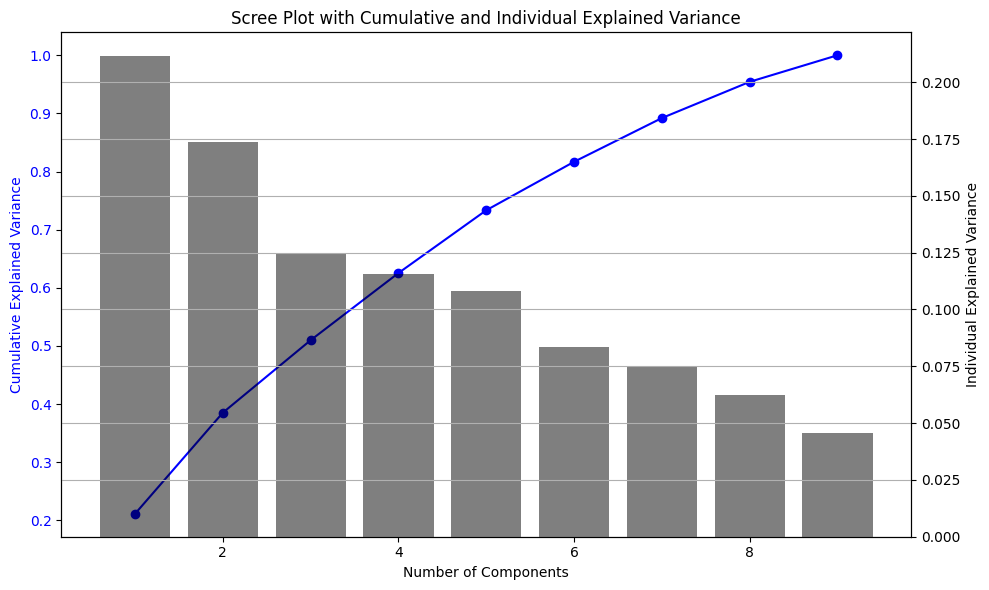

In [21]:
components_range = range(1, len(explained_variance) + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(components_range, cumulative_variance, marker='o', color='b', label='Cumulative Explained Variance')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Cumulative Explained Variance', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.bar(components_range, explained_variance, alpha=0.5, color='black', label='Individual Explained Variance')
ax2.set_ylabel('Individual Explained Variance', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Scree Plot with Cumulative and Individual Explained Variance')
fig.tight_layout()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of samples: 287952, Number of features: 9


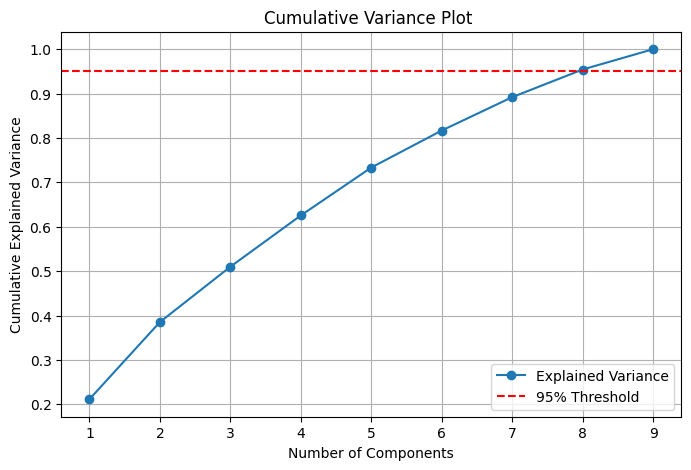

In [22]:
n_samples, n_features = df_scaled.shape
print(f"Number of samples: {n_samples}, Number of features: {n_features}")

explained_variance = []
components_range = range(1, min(n_samples, n_features) + 1)

# Calculate cumulative explained variance for each number of components
for n_components in components_range:
    pca = PCA(n_components=n_components)
    pca.fit(df_scaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

#Plotting the Scree Plot with a 95% threshold line
plt.figure(figsize=(8, 5))
plt.plot(components_range, explained_variance, marker='o', label='Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')  # Threshold line

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot ')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
#PCA FOR 2 n_components
pca_2d=PCA(n_components=2)
pc_2d = pca_2d.fit_transform(df_scaled)
explained_variance = pca_2d.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
cumulative_variance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.21139705, 0.38527389])

In [25]:
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.21139705 0.17387685]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


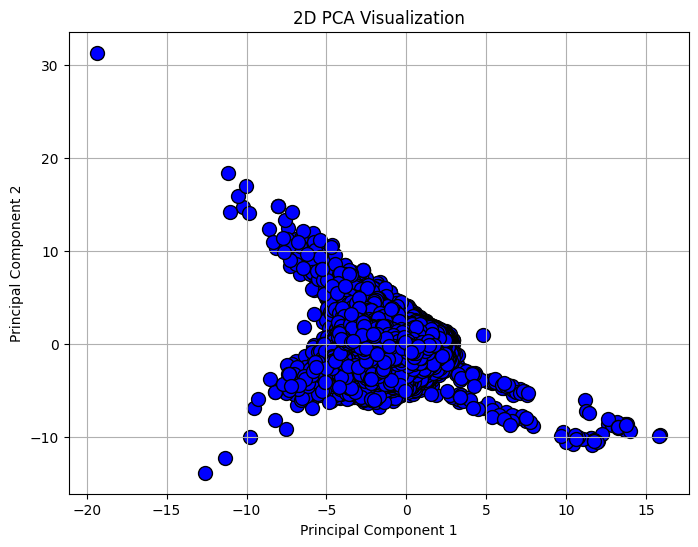

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(pc_2d[:, 0], pc_2d[:, 1], c='b', marker='o', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

In [27]:
#PCA for 3 n_components
pca_3d=PCA(n_components=3)
pc_3d = pca_3d.fit_transform(df_scaled)
explained_variance = pca_3d.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
cumulative_variance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.21139705, 0.38527389, 0.50993527])

In [29]:
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.21139705 0.17387685 0.12466138]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


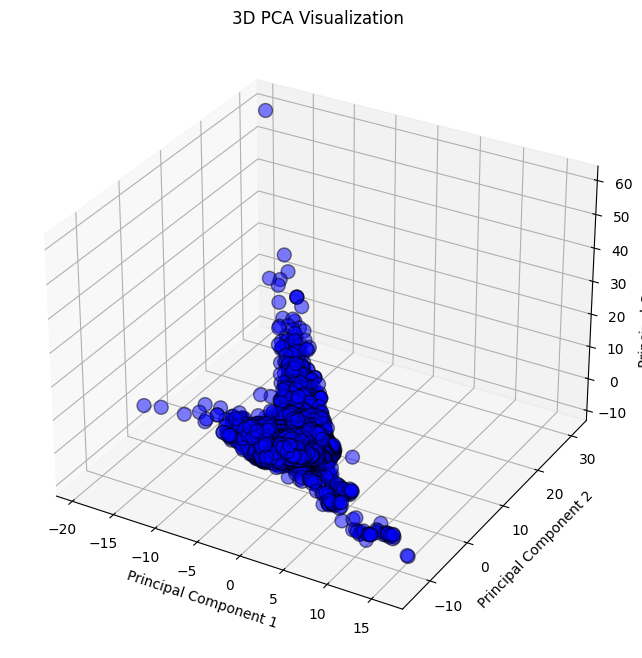

In [30]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_3d[:, 0], pc_3d[:, 1], pc_3d[:, 2], c='b', marker='o', edgecolor='k', s=100, alpha=0.5)
ax.set_title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [31]:
principal_components

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.16140834, -0.6797474 , -1.48452744, ...,  0.3191092 ,
         0.49076643, -0.79230602],
       [-0.33153242,  1.98868538, -0.77982431, ..., -0.6247419 ,
        -0.20472522, -0.95109621],
       [-0.5263152 , -0.64925726,  0.5823758 , ...,  0.2272192 ,
        -0.16287407, -0.39591432],
       ...,
       [ 0.75389746, -0.21407479,  0.35032564, ..., -0.6174836 ,
        -0.1977092 , -0.07514129],
       [ 0.30396969, -0.86554914, -0.4704552 , ...,  1.55121646,
         0.14879689,  0.03690732],
       [-1.82846826, -1.11456089,  0.62590834, ...,  0.11408782,
         1.00031714,  0.86613505]])

In [32]:
num_components = principal_components.shape[1]
column_names = [f'PC{i+1}' for i in range(num_components)]
principal_df = pd.DataFrame(principal_components, columns=column_names)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
#Final PC's
principal_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.161408,-0.679747,-1.484527,-1.148759,-0.132062,0.191490,0.319109,0.490766,-0.792306
1,-0.331532,1.988685,-0.779824,-0.503905,1.099178,-0.598857,-0.624742,-0.204725,-0.951096
2,-0.526315,-0.649257,0.582376,1.931929,-0.867226,0.605504,0.227219,-0.162874,-0.395914
3,-1.040200,-0.945499,-0.748824,-0.047428,-0.621919,0.098981,1.738711,0.346156,1.032104
4,-1.907891,0.667548,-1.453849,-1.382930,-0.129949,-0.967729,0.510628,0.024403,-0.345779
...,...,...,...,...,...,...,...,...,...
287947,-0.096800,0.219659,0.021501,0.676501,0.726517,0.271465,-0.457917,0.284651,-0.005779
287948,0.438718,-0.843702,-0.486816,-0.723484,-0.211515,-0.139590,1.215449,0.190778,-0.170651
287949,0.753897,-0.214075,0.350326,0.162506,1.005788,0.253281,-0.617484,-0.197709,-0.075141
287950,0.303970,-0.865549,-0.470455,-0.551973,-0.440052,-0.128731,1.551216,0.148797,0.036907


# Clustering Methods :
## K-Means

In [34]:
#To Visually depict the clusters
K_means_df=principal_df.iloc[:, :3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
K_means_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3
0,-0.161408,-0.679747,-1.484527
1,-0.331532,1.988685,-0.779824
2,-0.526315,-0.649257,0.582376
3,-1.040200,-0.945499,-0.748824
4,-1.907891,0.667548,-1.453849
...,...,...,...
287947,-0.096800,0.219659,0.021501
287948,0.438718,-0.843702,-0.486816
287949,0.753897,-0.214075,0.350326
287950,0.303970,-0.865549,-0.470455


In [36]:
#Sampling the Data to 50,000 rows
sampled_Kmeans_df = K_means_df.sample(n=50000, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(principal_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(n_clusters=3, random_state=42)

In [38]:
inertia = []
silhouette_scores = []

k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_Kmeans_df)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sampled_Kmeans_df, kmeans.labels_))
    print(f"K-Means clustering completed for k = {k}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


K-Means clustering completed for k = 2
K-Means clustering completed for k = 3
K-Means clustering completed for k = 4
K-Means clustering completed for k = 5
K-Means clustering completed for k = 6
K-Means clustering completed for k = 7
K-Means clustering completed for k = 8
K-Means clustering completed for k = 9
K-Means clustering completed for k = 10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


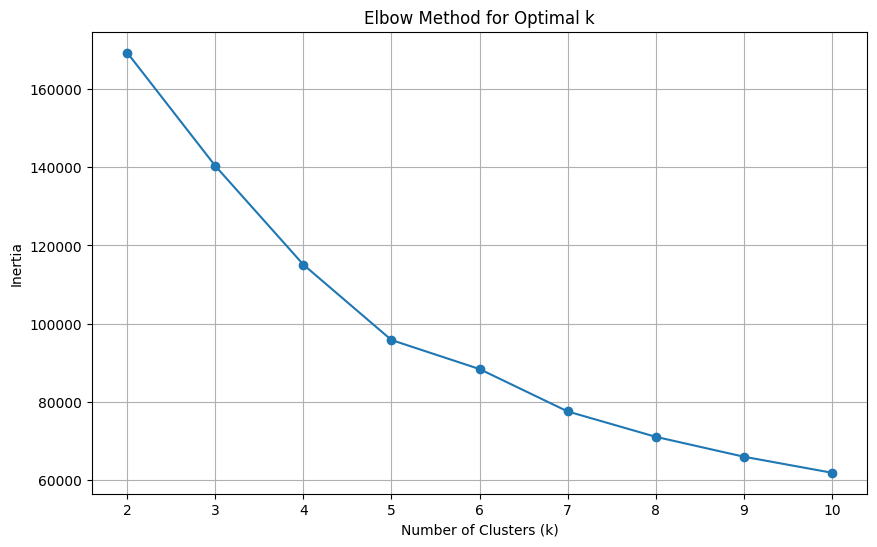

In [39]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.xticks(k_range)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


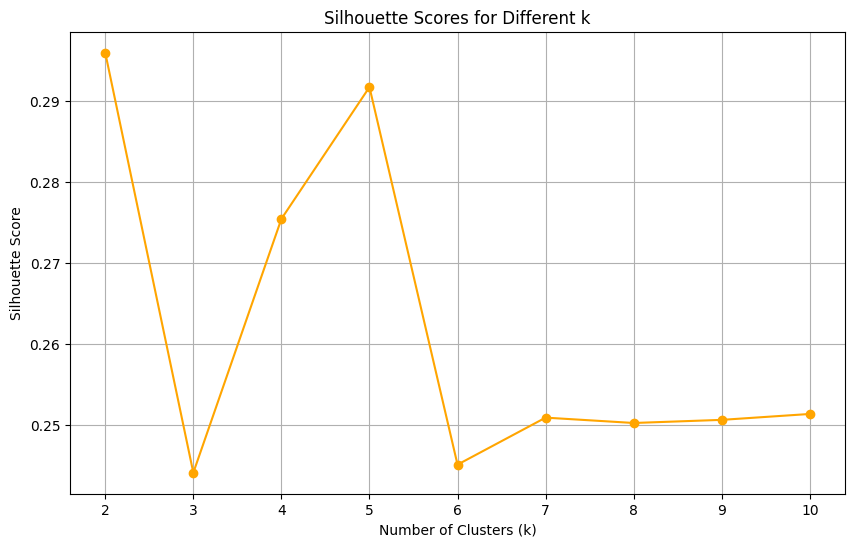

In [40]:
#Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid()
plt.xticks(k_range)
plt.show()

In [41]:
#Optimal Number of Clusters n=5
Kmeans_Op=KMeans(n_clusters=5 , random_state=42)
Kmeans_Op.fit(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(n_clusters=5, random_state=42)

In [42]:
clusters = Kmeans_Op.predict(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


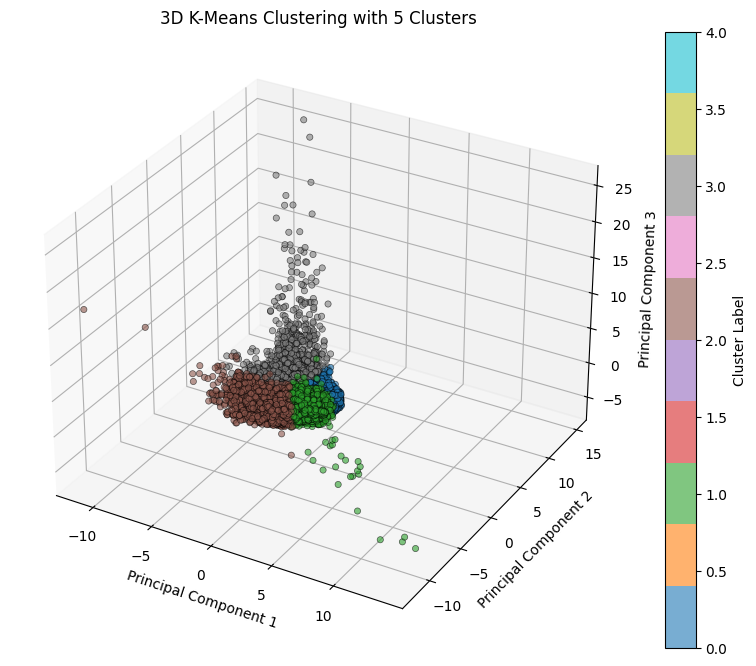

In [43]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    sampled_Kmeans_df['PC3'],
    c=clusters,
    cmap='tab10',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D K-Means Clustering with 5 Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


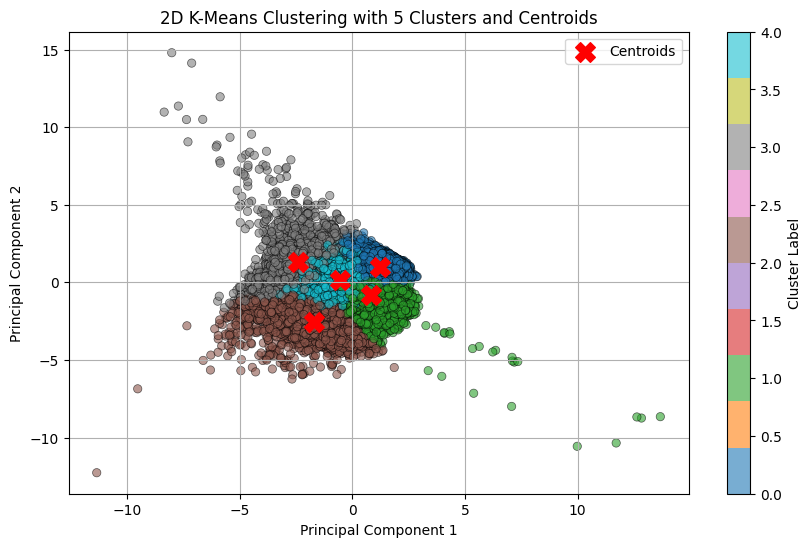

In [44]:
centroids = Kmeans_Op.cluster_centers_
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    c=clusters,
    cmap='tab10',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D K-Means Clustering with 5 Clusters and Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [45]:
#4 clusters
Kmeans_4c=KMeans(n_clusters=4 , random_state=42)
Kmeans_4c.fit(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(n_clusters=4, random_state=42)

In [46]:
clusters_4c = Kmeans_4c.predict(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


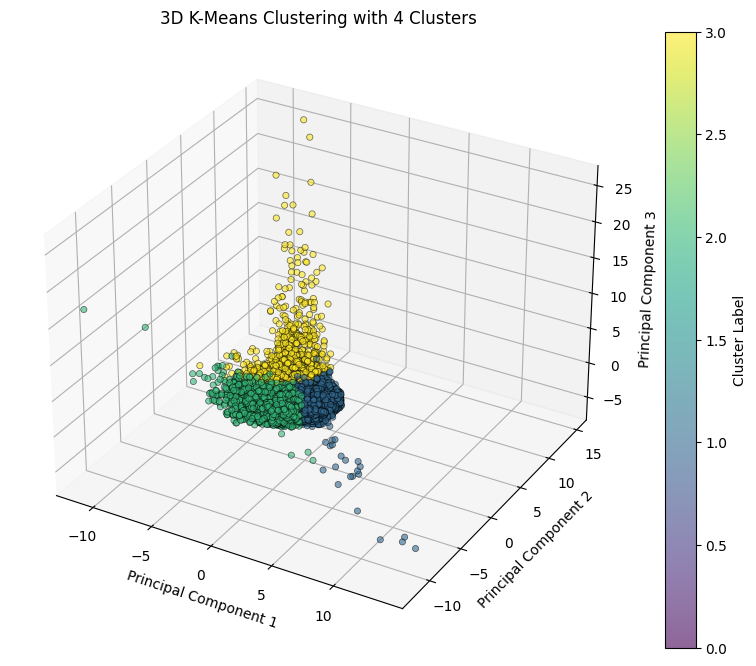

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    sampled_Kmeans_df['PC3'],
    c=clusters_4c,
    cmap='viridis',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D K-Means Clustering with 4 Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


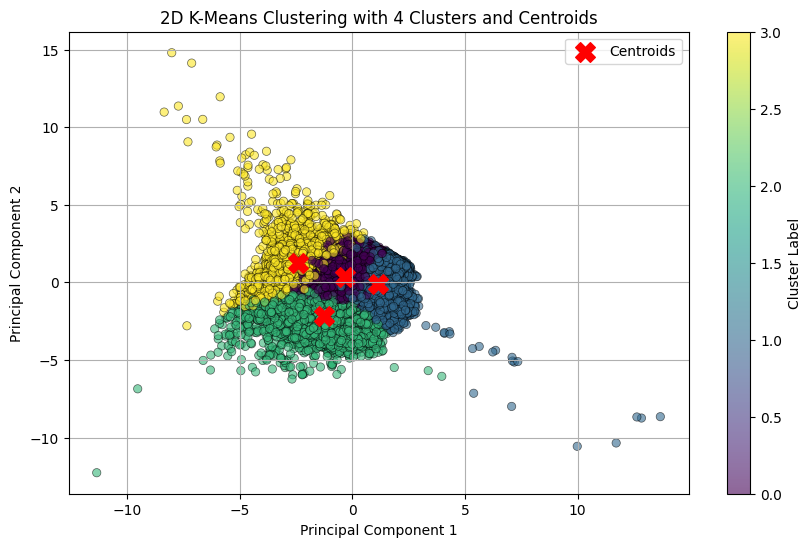

In [48]:
centroids = Kmeans_4c.cluster_centers_
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    c=clusters_4c,
    cmap='viridis',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D K-Means Clustering with 4 Clusters and Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [49]:
#2 Clusters
Kmeans_2c=KMeans(n_clusters=2 , random_state=42)
Kmeans_2c.fit(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(n_clusters=2, random_state=42)

In [50]:
clusters_2c = Kmeans_2c.predict(sampled_Kmeans_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


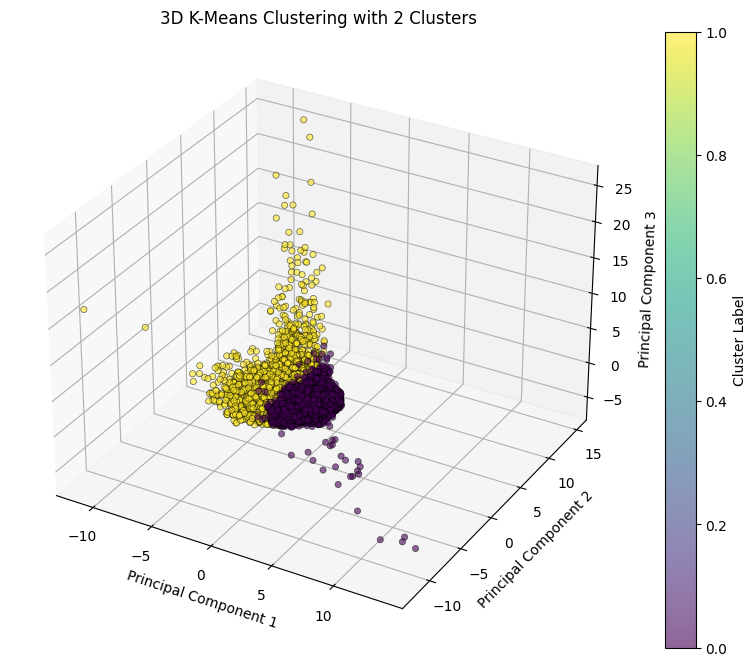

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    sampled_Kmeans_df['PC3'],
    c=clusters_2c,
    cmap='viridis',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D K-Means Clustering with 2 Clusters')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


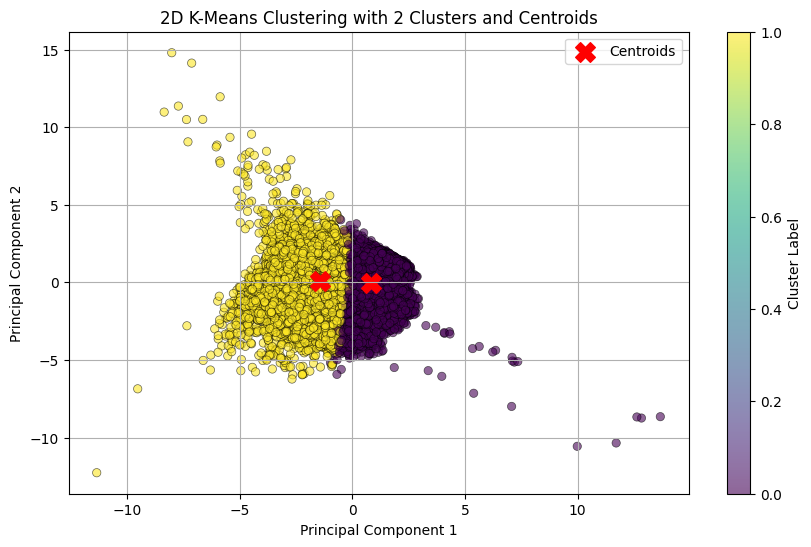

In [52]:
centroids = Kmeans_2c.cluster_centers_
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    c=clusters_2c,
    cmap='viridis',
    alpha=0.6,
    edgecolors='k',
    linewidth=0.5
)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D K-Means Clustering with 2 Clusters and Centroids')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [53]:
Kmeans_final_df=sampled_Kmeans_df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
Kmeans_final_df['Cluster']=clusters_4c

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
Kmeans_final_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,Cluster
150941,1.691396,1.432657,0.295962,1
210447,1.195681,-0.287647,-0.609969,1
276738,-4.553203,-0.675069,-0.105089,3
197027,1.913950,-0.235438,0.498752,1
53722,0.097594,1.288430,-0.885710,0
...,...,...,...,...
201444,1.574010,0.710945,-0.100990,1
67594,-2.358400,-1.596949,1.268890,2
237211,-0.020297,1.153566,-0.483301,0
207491,-0.132832,0.650475,-0.450742,0


##Hierarchical Clustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


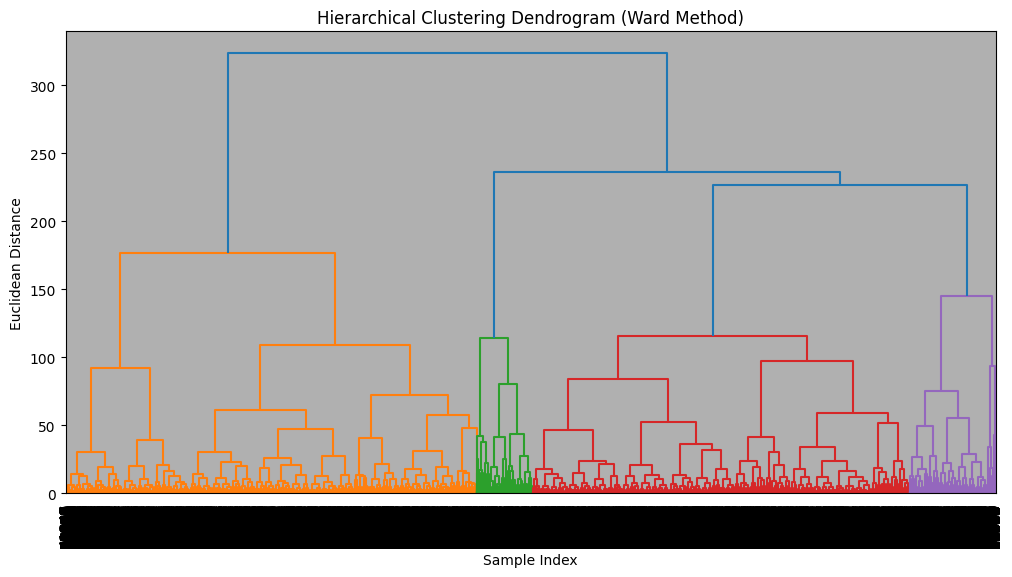

In [56]:
#Hierarchical Clustering using ward method
euclidean_dist_matrix = pdist(sampled_Kmeans_df, metric='euclidean')

linkage_matrix_ward = linkage(euclidean_dist_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_ward, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


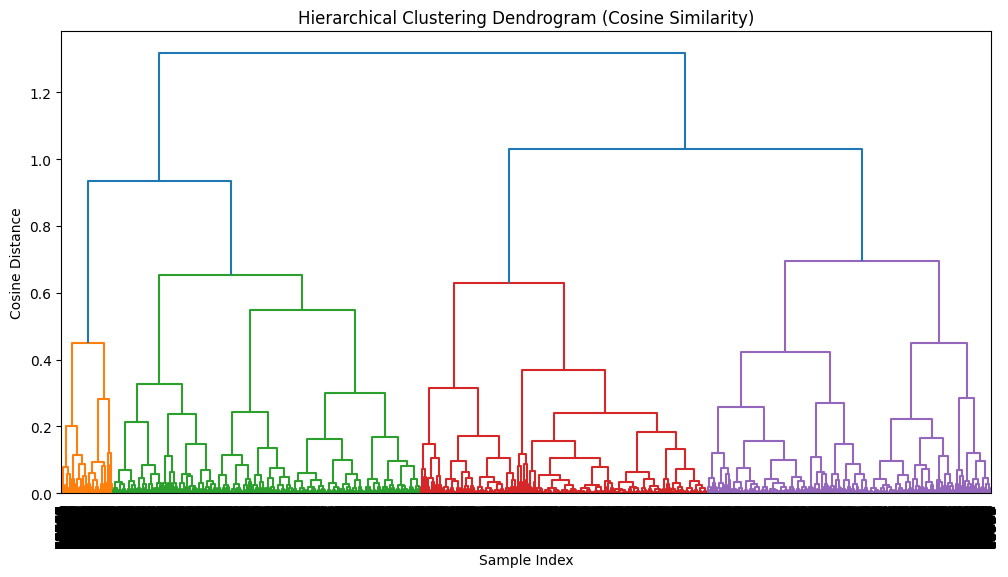

In [57]:
#Hierarchical Clustering using Cosine Similarity Distance Metric
cosine_dist_matrix = pdist(sampled_Kmeans_df, metric='cosine')
linkage_matrix = linkage(cosine_dist_matrix, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Cosine Similarity)')
plt.xlabel('Sample Index')
plt.ylabel('Cosine Distance')
plt.show()

## DBSCAN

In [58]:
#DBSCAN clustering
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(sampled_Kmeans_df)

sampled_Kmeans_df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


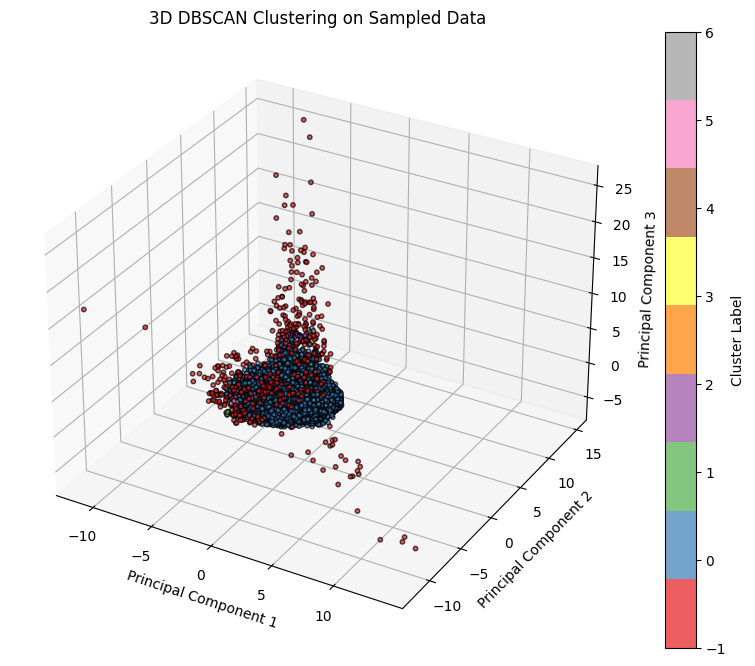

In [59]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    sampled_Kmeans_df['PC1'],
    sampled_Kmeans_df['PC2'],
    sampled_Kmeans_df['PC3'],
    c=sampled_Kmeans_df['Cluster'],
    cmap='Set1',
    alpha=0.7,
    s=10,
    edgecolors='k'
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D DBSCAN Clustering on Sampled Data')
plt.colorbar(scatter, label='Cluster Label')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


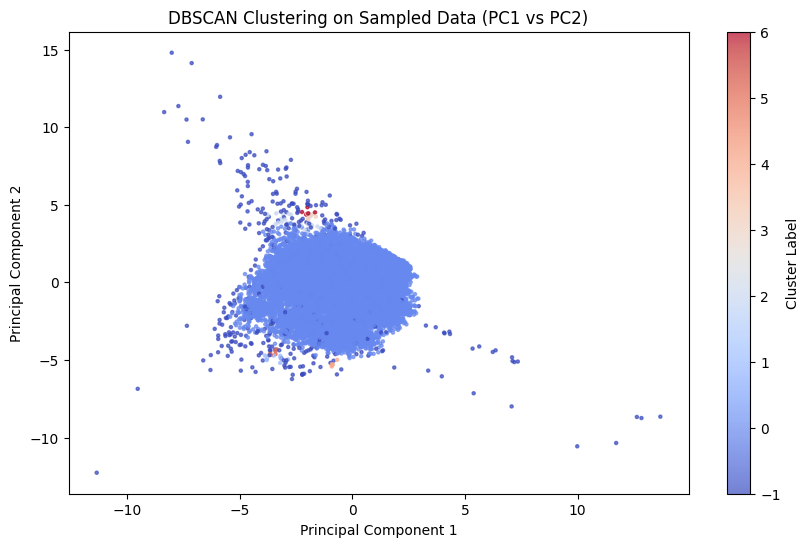

In [60]:
# Plot the 2D clusters (PC1 vs PC2)
plt.figure(figsize=(10, 6))
plt.scatter(
    sampled_Kmeans_df['PC1'], sampled_Kmeans_df['PC2'],
    c=clusters, cmap='coolwarm', s=5, alpha=0.7
)
plt.title('DBSCAN Clustering on Sampled Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Association Rule Mining

In [61]:
df=pd.read_csv("Trail_1.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Severity,Date,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,2,2020-01-01,03:40:00,04:31:28,34.155567,-118.431243,0.00,At Woodman Ave - Accident.,Sherman Oaks,Los Angeles,...,False,False,False,False,False,False,False,False,False,Night
1,3,2020-01-01,01:30:18,02:14:53,27.489941,-82.470680,1.83,Exit ramp from I-75 Northbound to FL-64 lane b...,Bradenton,Manatee,...,False,False,False,False,False,False,False,False,False,Night
2,3,2020-01-01,12:26:06,13:44:36,42.733212,-73.698502,0.00,Right lane blocked due to accident on I-787 So...,Watervliet,Albany,...,False,False,False,False,False,False,False,False,False,Day
3,2,2020-01-01,19:22:35,23:22:35,45.351210,-121.973580,0.00,At E Lolo Pass Rd/NF-18 - Accident.,Welches,Clackamas,...,False,False,False,False,False,False,False,False,False,Night
4,2,2020-01-01,04:59:00,05:32:29,35.354406,-119.180925,0.00,At Westside Pkwy - Accident.,Bakersfield,Kern,...,False,False,False,False,False,False,False,True,False,Night


In [63]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Severity,0
Date,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
City,0
County,0


Columns Required for Association Rule Mining :

Boolean Values

* Amenity
* Bump
* Crossing
* Give_Way
* Junction
* No_Exit
* Railway
* Roundabout
* Station
* Stop
* Traffic_Calming
* Traffic_Signal
* Turning_Loop

Categorical  Values needs to be encoded

* Sunrise_Sunset
* Weather_Condition

In [64]:
arm_df=df[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
           'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming','Traffic_Signal', 'Turning_Loop',
           'Sunrise_Sunset', 'Weather_Condition']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
arm_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weather_Condition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Partly Cloudy
1,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Haze
2,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Mostly Cloudy
3,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Cloudy
4,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Fair


Encoding Categorical Values

In [66]:
arm_data_encoded=pd.get_dummies(arm_df,columns=['Sunrise_Sunset','Weather_Condition'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
arm_data_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,...,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder / Wintry Mix,Weather_Condition_Thunder and Hail,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Tornado,Weather_Condition_Widespread Dust / Windy,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287947,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287950,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Applying Apriori algorithm to find frequent itemsets

In [68]:
frequent_itemsets = apriori(arm_data_encoded, min_support=0.3, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.665142,(Sunrise_Sunset_Day)
1,0.334858,(Sunrise_Sunset_Night)
2,0.474989,(Weather_Condition_Fair)
3,0.309045,"(Sunrise_Sunset_Day, Weather_Condition_Fair)"


In [70]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sunrise_Sunset_Day),(Weather_Condition_Fair),0.665142,0.474989,0.309045,0.464629,0.97819,-0.006891,0.980650,-0.062428
1,(Weather_Condition_Fair),(Sunrise_Sunset_Day),0.474989,0.665142,0.309045,0.650635,0.97819,-0.006891,0.958477,-0.040738


In [72]:
#Top 10 rules with Maximum Lift and Confidence
rules_sorted = rules.sort_values(by=['lift', 'confidence'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
rules_sorted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Weather_Condition_Fair),(Sunrise_Sunset_Day),0.474989,0.665142,0.309045,0.650635,0.97819,-0.006891,0.958477,-0.040738
0,(Sunrise_Sunset_Day),(Weather_Condition_Fair),0.665142,0.474989,0.309045,0.464629,0.97819,-0.006891,0.980650,-0.062428


In [74]:
#Grid Search
def run_apriori(min_support, min_confidence):

    frequent_itemsets = apriori(arm_data_encoded, min_support=min_support, use_colnames=True)


    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

support_values = [0.01, 0.02, 0.05]
confidence_values = [0.5, 0.7, 0.9]


best_rules = None
max_rules = 0

for support in support_values:
    for confidence in confidence_values:
        rules = run_apriori(support, confidence)
        if len(rules) > max_rules:
            max_rules = len(rules)
            best_rules = rules

if best_rules is not None:
    best_rules_df = best_rules.head(15)
    print(f"Best rules found with {max_rules} rules:")
    display(best_rules_df)
else:
    print("No rules found during hyperparameter tuning.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best rules found with 26 rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Crossing),(Traffic_Signal),0.103000,0.117658,0.055794,0.541691,4.603922,0.043675,1.925209,0.872680
1,(Crossing),(Sunrise_Sunset_Day),0.103000,0.665142,0.073839,0.716882,1.077788,0.005329,1.182750,0.080461
2,(Junction),(Sunrise_Sunset_Day),0.067782,0.665142,0.043028,0.634799,0.954380,-0.002057,0.916913,-0.048775
3,(Station),(Sunrise_Sunset_Day),0.026331,0.665142,0.019073,0.724347,1.089011,0.001559,1.214781,0.083946
4,(Stop),(Sunrise_Sunset_Day),0.027928,0.665142,0.018354,0.657175,0.988022,-0.000223,0.976760,-0.012318
5,(Stop),(Weather_Condition_Fair),0.027928,0.474989,0.014777,0.529097,1.113915,0.001511,1.114903,0.105204
6,(Traffic_Signal),(Sunrise_Sunset_Day),0.117658,0.665142,0.082187,0.698524,1.050188,0.003928,1.110729,0.054162
7,(Weather_Condition_Cloudy),(Sunrise_Sunset_Day),0.152630,0.665142,0.089383,0.585620,0.880443,-0.012137,0.808094,-0.138117
8,(Weather_Condition_Fair),(Sunrise_Sunset_Day),0.474989,0.665142,0.309045,0.650635,0.978190,-0.006891,0.958477,-0.040738
9,(Weather_Condition_Light Rain),(Sunrise_Sunset_Day),0.046181,0.665142,0.030182,0.653557,0.982582,-0.000535,0.966560,-0.018246


In [76]:
top_15_support = best_rules_df.nlargest(15, 'support')
top_15_confidence = best_rules_df.nlargest(15, 'confidence')
top_15_lift = best_rules_df.nlargest(15, 'lift')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


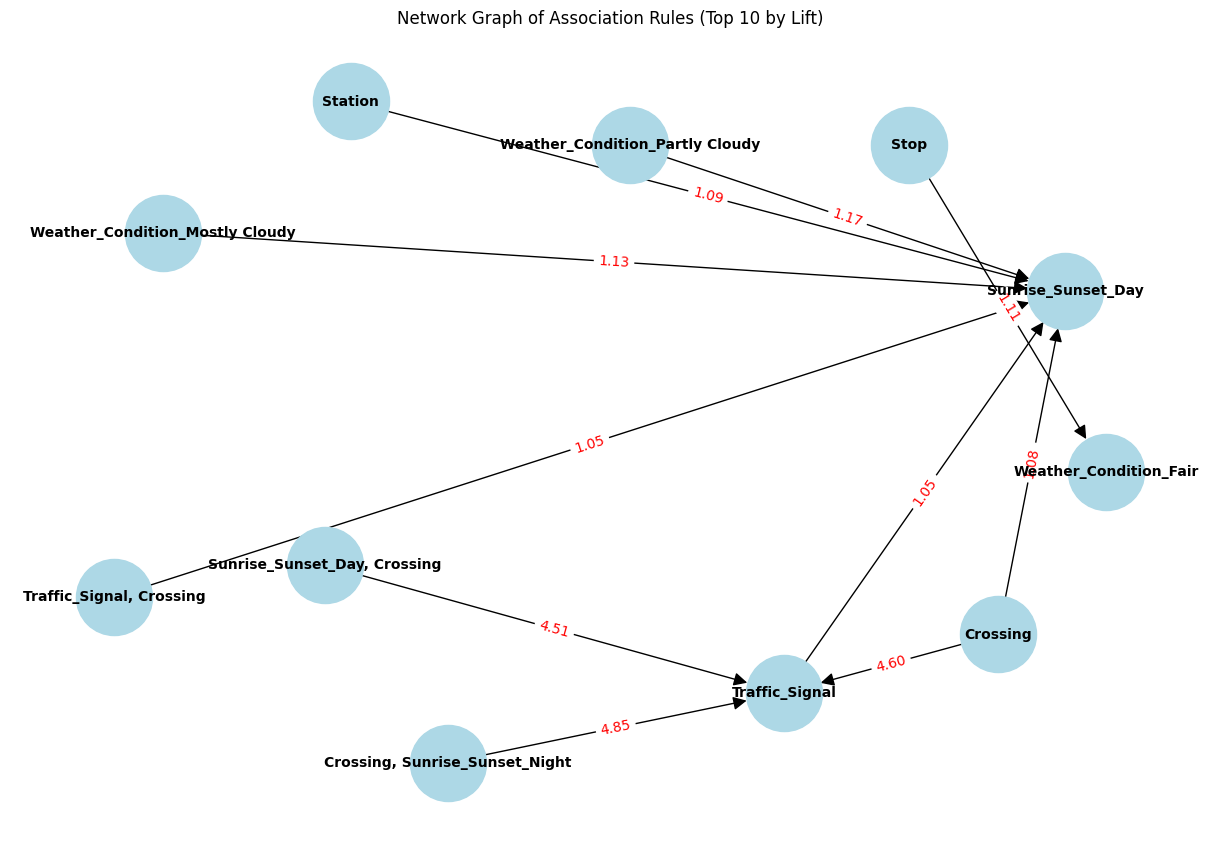

In [79]:
G = nx.DiGraph()

for _, row in top_15_lift.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['lift'])


pos = nx.spring_layout(G, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d:.2f}' for u, v, d in G.edges(data='weight')}, font_color='red')

plt.title('Network Graph of Association Rules (Top 10 by Lift)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


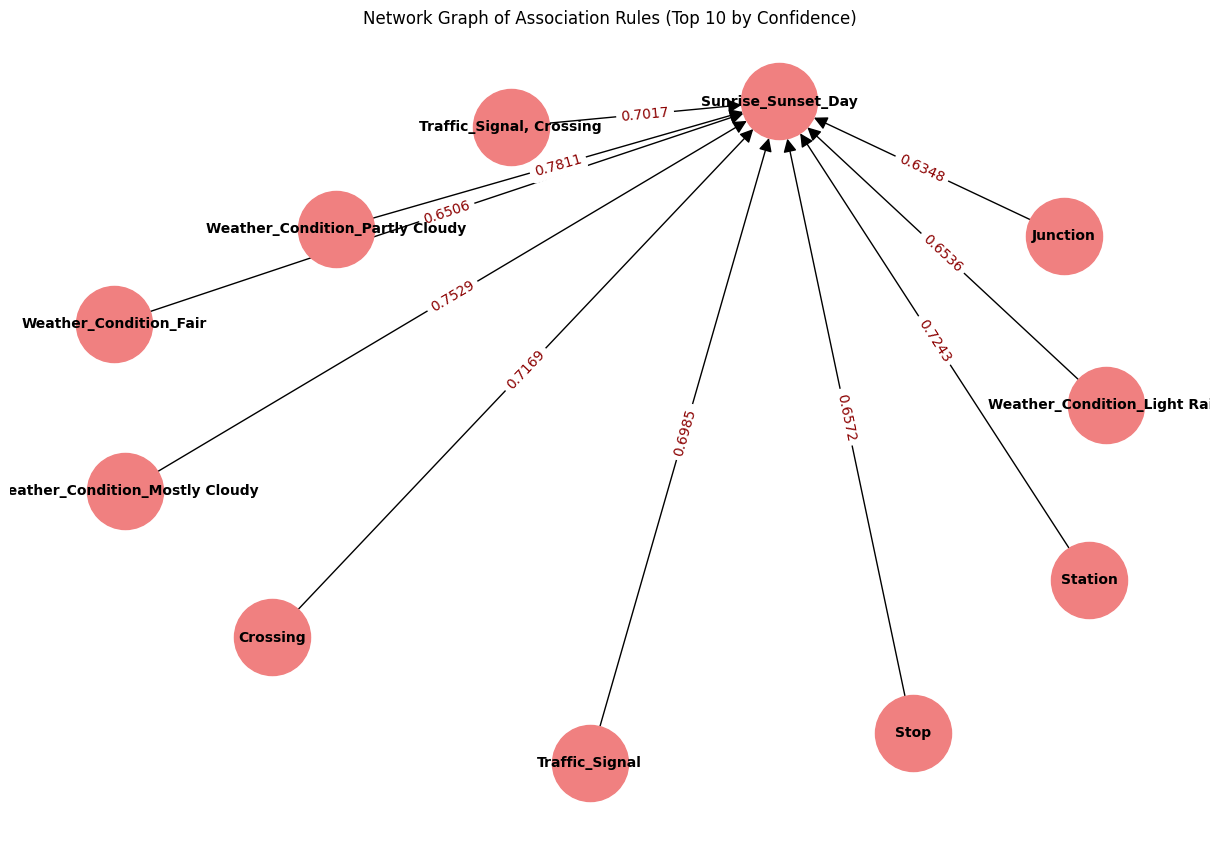

In [80]:
G_confidence = nx.DiGraph()

for _, row in top_15_confidence.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G_confidence.add_edge(antecedents, consequents, weight=row['confidence'])

pos = nx.spring_layout(G_confidence, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G_confidence, pos, with_labels=True, node_color='lightcoral', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G_confidence, 'weight')
nx.draw_networkx_edge_labels(G_confidence, pos, edge_labels={(u, v): f'{d:.4f}' for u, v, d in G_confidence.edges(data='weight')}, font_color='darkred')

plt.title('Network Graph of Association Rules (Top 10 by Confidence)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


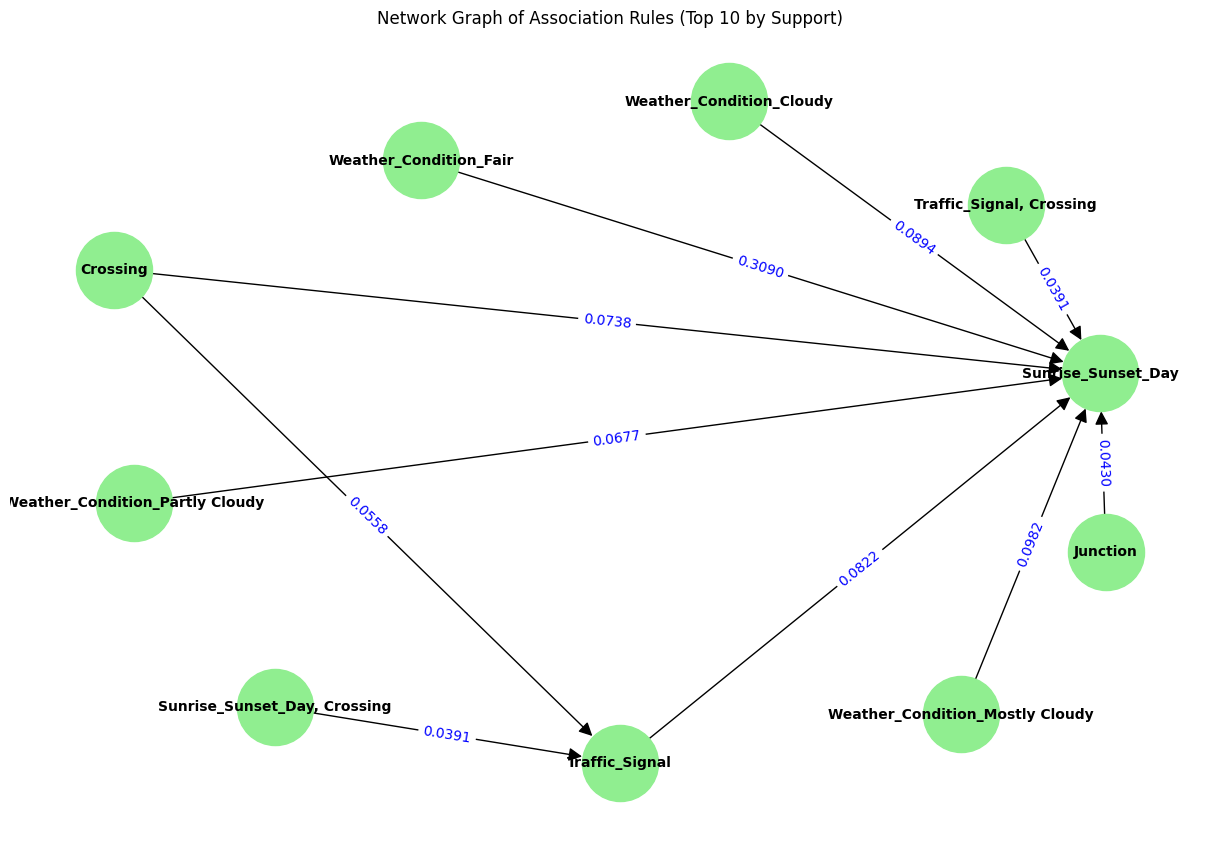

In [81]:
G_support = nx.DiGraph()

for _, row in top_15_support.head(10).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G_support.add_edge(antecedents, consequents, weight=row['support'])
pos = nx.spring_layout(G_support, k=2)

plt.figure(figsize=(12, 8))
nx.draw(G_support, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
edge_labels = nx.get_edge_attributes(G_support, 'weight')
nx.draw_networkx_edge_labels(G_support, pos, edge_labels={(u, v): f'{d:.4f}' for u, v, d in G_support.edges(data='weight')}, font_color='blue')

plt.title('Network Graph of Association Rules (Top 10 by Support)')
plt.show()